In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(cluster_std=4, centers=3, random_state=123, n_samples=400)

In [3]:
X.shape, y.shape

((400, 2), (400,))

In [4]:
np.unique(y)

array([0, 1, 2])

In [5]:
colors = ('magenta', 'cyan', 'mediumseagreen')

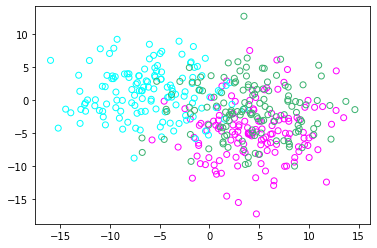

In [6]:
for k, color in enumerate(colors):
  plt.scatter(X[y == k, 0], X[y == k, 1], facecolors='none', edgecolors=color)

In [7]:
class GDA:
  def __init__(self):
    self.prior_prob = dict()
    self.mean_vects = dict()
    self.cov_mats = dict()
    self.det_cov_mats = dict()
    self.inv_cov_mats = dict()
    self.classes = []

  def train(self, X, y):
    self.classes = np.unique(y)

    for cls in np.unique(y):
      self.prior_prob[cls] = X[y == cls].shape[0] / X.shape[0]
      self.mean_vects[cls] = np.mean(X[y == cls], axis=0)
      self.cov_mats[cls] = np.cov(X[y == cls], rowvar=False)
      self.det_cov_mats[cls] = np.linalg.det(self.cov_mats[cls])
      self.inv_cov_mats[cls] = np.linalg.inv(self.cov_mats[cls])

  def predict(self, x):
    prob_per_classes = []

    for cls in self.classes:
      prob_per_classes.append(np.log(self.prior_prob[cls]) - 1/2 * np.log(self.det_cov_mats[cls]) -
                                     1/2 * (x - self.mean_vects[cls]).T @ self.inv_cov_mats[cls] @
                                     (x - self.mean_vects[cls]))
    
    return np.argmax(prob_per_classes)


In [8]:
model = GDA()

In [9]:
model.train(X, y)

In [10]:
STEP = 0.5

In [11]:
min_left, max_right = np.min(X[:, 0]), np.max(X[:, 0])
min_bot, max_top = np.min(X[:, 1]), np.max(X[:, 1])

In [12]:
xx, yy = np.meshgrid(np.arange(min_left * 1.1, max_right * 1.1, STEP),
                     np.arange(min_bot * 1.1, max_top * 1.1, STEP))

In [13]:
xx.shape, yy.shape

((66, 68), (66, 68))

In [14]:
grid = np.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=1)

In [15]:
grid.shape

(4488, 2)

In [16]:
predictions = []

In [17]:
for elem in grid:
  predictions.append(model.predict(elem))
  
len(predictions)

4488

In [18]:
predictions = np.array(predictions).reshape(xx.shape)

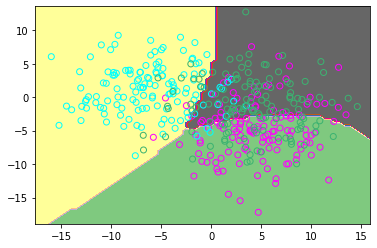

In [19]:
plt.contourf(xx, yy, predictions, cmap='Accent')

for k, color in enumerate(colors):
  plt.scatter(X[y == k, 0], X[y == k, 1], facecolors='none', edgecolors=color)